In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Constants

In [3]:
DATA_DIR = "classification_data_HWK1/"
COLS = ["red", "blue","green", "orange", "black", "cyan"]
MARKS = [".","+","*","o","x","^"]

# Data

In [4]:
D = {}
for l in "ABC":
    D[l] = {}
    for t in ["train", "test"]:
        D[l][t] = pd.read_csv(DATA_DIR + "classification" + l + "." + t, sep = "\t", names = ["x1", "x2", "y"])

In [5]:
D['A']['train'].as_matrix()

array([[-3.60340505,  1.3266    ,  1.        ],
       [-4.2190114 ,  2.015     ,  1.        ],
       [-1.51565812,  0.5059    ,  1.        ],
       [-1.16975695,  0.3815    ,  1.        ],
       [ 0.52274116, -0.6572    ,  1.        ],
       [-0.14174035, -0.7083    ,  1.        ],
       [-3.2644966 ,  1.312     ,  1.        ],
       [-1.7093627 ,  0.2236    ,  1.        ],
       [-2.06451872,  0.6392    ,  1.        ],
       [-2.7745778 ,  1.139     ,  1.        ],
       [-4.4637327 ,  1.2861    ,  1.        ],
       [-2.05557939,  0.716     ,  1.        ],
       [-4.93081485,  1.9442    ,  1.        ],
       [-2.78573378,  0.8165    ,  1.        ],
       [-3.78492412,  1.0945    ,  1.        ],
       [-0.023503  , -0.1801    ,  1.        ],
       [-4.0787268 ,  1.6789    ,  1.        ],
       [-4.88879174,  2.2006    ,  1.        ],
       [-4.11260798,  1.3405    ,  1.        ],
       [-5.11303227,  1.578     ,  1.        ],
       [-2.76271871,  0.6868    ,  1.   

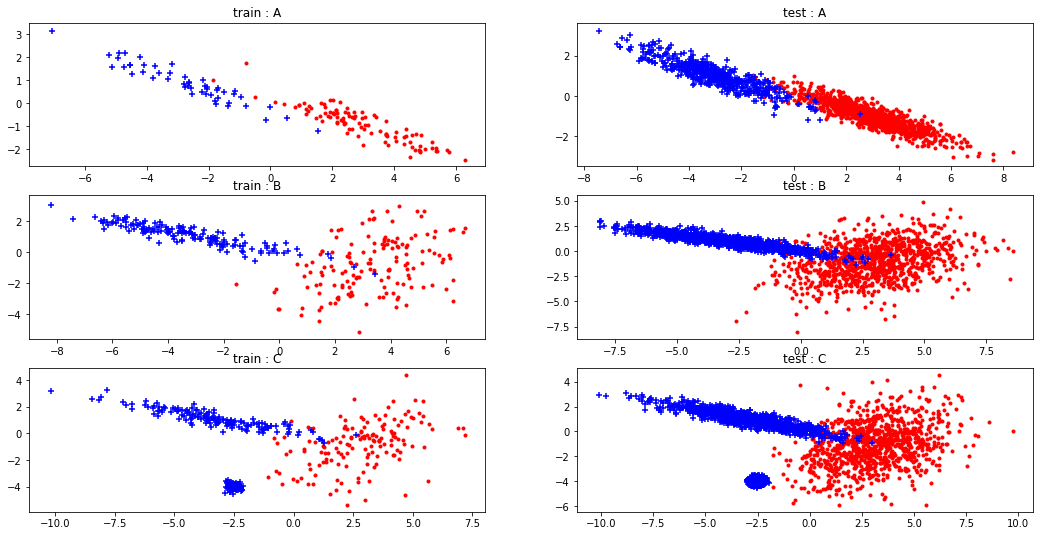

In [6]:
f, ax = plt.subplots(3, 2, figsize = (18, 9))

for k, l in enumerate("ABC"):
    for j, t in enumerate(["train", "test"]):
        x = D[l][t].as_matrix()[:, :2]
        y = D[l][t].as_matrix()[:, 2]
        for i, label in enumerate([0, 1]):
            ax[k][j].scatter(x[y == label, 0], x[y == label, 1], c = COLS[i], marker=MARKS[i])
            ax[k][j].set_title(t + " : " + l);

# Plot tools

In [7]:
def plot_data(data,labels=None):
    """
    Affiche des donnees 2D
    :param data: matrice des donnees 2d
    :param labels: vecteur des labels (discrets)
    :return:
    """
    cols,marks = ["red", "blue","green", "orange", "black", "cyan"],[".","+","*","o","x","^"]
    if labels is None:
        plt.scatter(data[:,0],data[:,1], c='r',  marker="x")
        return
    for i,l in enumerate(sorted(list(set(labels.flatten())))):
        plt.scatter(data[labels==l,0],data[labels==l,1],c=cols[i],marker=marks[i])
        
def plot_frontiere(data,f,step=200):
    """ Trace un graphe de la frontiere de decision de f
    :param data: donnees
    :param f: fonction de decision
    :param step: pas de la grille
    :return:
    """
    grid,x, y = make_grid(data = data, step = step)
    plt.contourf(x, y, f(grid).reshape(x.shape), colors=('gray', 'blue'), levels=[-1,0,1], alpha=0.3)

# Class

In [65]:
def Quadratic(datax, mu, sigma):
    """
    Compute the quadratic argument of gausisan density
    """

    return -0.5 * np.dot(np.dot((datax - mu), np.linalg.inv(sigma)), (datax - mu).T)
    

class LDA(object):
    """
    LDA class for binary (0, 1) classification
    """
    def __init__(self):
        self.pi = None
        self.mu_0 = None
        self.mu_1 = None
        self.sigma = None
        return
    def fit(self, datax, datay):
        """
        Compute the MLE of for LDA
        """
        # Length of examples
        N = len(datax)
        # Number of class one
        A = datay.sum()
        # Compute pi MLE
        self.pi = A / N
        # Compute mu MLE
        self.mu_0 = (X[Y == 0].sum(axis = 0) / (N - A)).reshape(1, -1)
        self.mu_1 = (X[Y == 1].sum(axis = 0) / A).reshape(1, -1)
        # Compute Sigma MLE
        sigma_tilda_0 = np.dot((datax[datay == 0] - self.mu_0).T, (datax[datay == 0] - self.mu_0)) / (N - A)
        sigma_tilda_1 = np.dot((datax[datay == 1] - self.mu_1).T, (datax[datay == 1] - self.mu_1)) / A 
        self.sigma = ((N - A) * sigma_tilda_0 + A * sigma_tilda_1) / N
        return
    def predict(self, datax):
        """
        Compute p(y = 1 | x)
        """
        p = []
        for x in datax:
            p.append(1 / (1 + (1 - self.pi) / self.pi * np.exp(Quadratic(x.reshape(1, -1),
                                                                self.mu_0,
                                                                self.sigma) 
                                                     - Quadratic(x.reshape(1, -1),
                                                                self.mu_1,
                                                                self.sigma))))
        return np.array(p).reshape(-1, 1)
    def score(self, datax, datay, threshold = 0.5):
        """
        Given data and their label, return the correct percentage of classification
        """
        return ((self.predict(datax) > threshold) == datay.reshape(-1 ,1)).sum() / len(datay)

# Figures

# Test zone

In [62]:
Xtrain, Ytrain = D['A']['train'].as_matrix()[:, :2], D['A']['train'].as_matrix()[:, 2]
Xtest, Ytest = D['A']['test'].as_matrix()[:, :2], D['A']['test'].as_matrix()[:, 2]

In [63]:
D['A']['train'].as_matrix()

array([[-3.60340505,  1.3266    ,  1.        ],
       [-4.2190114 ,  2.015     ,  1.        ],
       [-1.51565812,  0.5059    ,  1.        ],
       [-1.16975695,  0.3815    ,  1.        ],
       [ 0.52274116, -0.6572    ,  1.        ],
       [-0.14174035, -0.7083    ,  1.        ],
       [-3.2644966 ,  1.312     ,  1.        ],
       [-1.7093627 ,  0.2236    ,  1.        ],
       [-2.06451872,  0.6392    ,  1.        ],
       [-2.7745778 ,  1.139     ,  1.        ],
       [-4.4637327 ,  1.2861    ,  1.        ],
       [-2.05557939,  0.716     ,  1.        ],
       [-4.93081485,  1.9442    ,  1.        ],
       [-2.78573378,  0.8165    ,  1.        ],
       [-3.78492412,  1.0945    ,  1.        ],
       [-0.023503  , -0.1801    ,  1.        ],
       [-4.0787268 ,  1.6789    ,  1.        ],
       [-4.88879174,  2.2006    ,  1.        ],
       [-4.11260798,  1.3405    ,  1.        ],
       [-5.11303227,  1.578     ,  1.        ],
       [-2.76271871,  0.6868    ,  1.   

In [67]:
lda = LDA()
lda.fit(Xtrain, Ytrain)
lda.score(Xtrain, Ytrain)

0.98666666666666669